# Handwritten digit classification with MNIST dataset
This is a simple image classification challenge using the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Lets see if we can train a classifier that can accurately distinguish handwritten digits. For my implementation, instead of using a traditional machine learning classifier like Support Vector Machine or Random Forest, I will be using [Convolutional Neural Networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network), as they are by far the best choice for image data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
print("Running Tensorflow version", tf.__version__)

Running Tensorflow version 2.1.0


Reading in training and testing data:

## 1. Data collection

In [2]:
test = pd.read_csv("../input/digit-recognizer/test.csv")
train = pd.read_csv("../input/digit-recognizer/train.csv")

## 2. Pre-processing

### 2.1 Seperating images and labels
Seperating image data $X_i$ and target labels $y_i$ (as numpy arrays instead of dataframe/series objects).

In [3]:
# Training set
X_train = train.drop("label", axis=1).values
y_train = train['label'].values

# Test set
X_test = test.values

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)

X_train shape (42000, 784)
y_train shape (42000,)
X_test shape (28000, 784)


### 2.2 Reshaping
Reshaping flattened image data from $(m, 784)$  to $(m, 28, 28, 1)$ images, where $m$ is the number of examples in the train/test set.

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (42000, 28, 28, 1)
X_test shape (28000, 28, 28, 1)


### 2.3 One-hot encoding labels

In [5]:
Y_train = tf.keras.utils.to_categorical(y_train)

### 2.4 Normalizing

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
def show_images(dataset, n_images):
    """
    A simple function to display random images from the train or test set.
    
    arguments:
    dataset = specify dataset ('train' or 'test').
    n_images = the number of images to show.
    
    returns:
    void (displays images)
    """
    fig, axes = plt.subplots(nrows=1, ncols=n_images, figsize=(8, 8))
    if dataset == "train":
        for i in range(n_images):
            index = np.random.randint(0, len(X_train)-1)
            axes[i].imshow(X_train[index][:, :, 0], cmap='binary')
            axes[i].set_title(f"Label: {y_train[index]}")
        fig.tight_layout()
        plt.show()
    else:
        for i in range(n_images):
            index = np.random.randint(0, len(X_test)-1)
            axes[i].imshow(X_test[index][:, :, 0], cmap='binary')
            axes[i].set_title("Label: ?")
        fig.tight_layout()
        plt.show()

Training set:


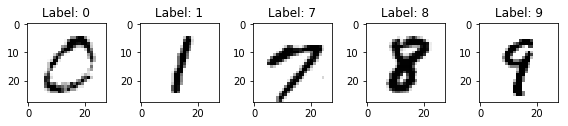

Test set:


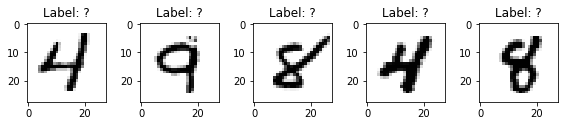

In [8]:
print("Training set:")
show_images('train', n_images=5)
print("Test set:")
show_images('test', n_images=5)

## 3. Modeling

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Activation, Flatten, Dense

In [10]:
def CNN_model(input_shape):
    """
    Implementation of a Convolutional Neural Network.
    
    arguments:
    input_shape -- shape of the images of the dataset

    returns:
    model -- a Model() instance in Keras
    """
    
    # Input layer
    X_input = Input(input_shape)

    # Hidden layer 1
    X = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same', name='conv1')(X_input)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPool2D(pool_size=(2, 2), name='max_pool1')(X)
    
    # Hidden layer 2
    X = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same', name='conv2')(X)
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu')(X)
    X = MaxPool2D(pool_size=(2, 2), name='max_pool2')(X)
    
    # Output layer
    X = Flatten()(X)
    X = Dense(10, activation='softmax', name='softmax')(X)
    
    model = Model(inputs=X_input, outputs=X, name='CNN_model')
    return model

In [11]:
cnn_model = CNN_model(X_train.shape[1:])
cnn_model.summary()

Model: "CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        25632     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 14, 14, 32)        12

In [12]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
cnn_model.fit(X_train, Y_train, validation_split=0.1, epochs=5, batch_size=100)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 44s 1ms/sample - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0603 - val_accuracy: 0.9812
Epoch 2/5
37800/37800 [==============================] - 43s 1ms/sample - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0156 - val_accuracy: 0.9947
Epoch 3/5
37800/37800 [==============================] - 43s 1ms/sample - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0123 - val_accuracy: 0.9955
Epoch 4/5
37800/37800 [==============================] - 43s 1ms/sample - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0069 - val_accuracy: 0.9976
Epoch 5/5
37800/37800 [==============================] - 43s 1ms/sample - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0080 - val_accuracy: 0.9971


### 4. Prediction

In [29]:
preds = cnn_model.predict(X_test) # predicting labels for test set
preds = np.argmax(preds, axis = 1) # only keeping the highest probability class
results = pd.Series(preds, name="Label")

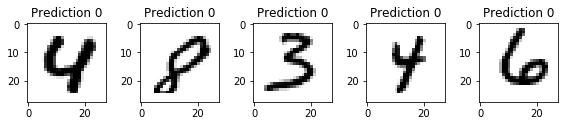

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))
for i in range(5):
    index = np.random.randint(0, len(X_test-1))
    axes[i].imshow(X_test[index][:,:,0], cmap='binary')
    axes[i].set_title(f"Prediction {str(np.argmax(preds[index]))}")
plt.tight_layout()

Nice! Our classifier seems to be very accurate!

In [33]:
submission = pd.concat([pd.Series(range(1,28001), name ="ImageId"),results], axis = 1)
submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [32]:
if input("Save prediction? (Y/N)") == "Y":
    submission.to_csv("cnn_mnist_datagen.csv",index=False)
    print("Saved successfull!")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
